In [3]:
import sys
sys.path.append('C:/Users/omerf/OneDrive/Masaüstü/dtmn/env/Lib/site-packages')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("financials.csv", index_col=0)

In [177]:
df

,Unnamed: 0,Gross Profit,ROE,ROA,NDebt/Ebitda,Current Ratio,Interest Cover,EBITDA/Trevenue,Earnpershare,OpCashflow Ratio,EBIT/TRevenue,Price Increase
0,0,0.877031,0.338481,0.528679,0.664134,1.106791,54.642857,0.396229,10.183028,0.964321,0.347609,1
1,1,0.881850,0.325877,0.556235,0.707387,1.250577,51.486726,0.418499,9.680532,1.042989,0.368578,0
2,2,0.866180,0.396562,0.645716,0.932462,1.477866,37.000000,0.392369,7.141431,1.039006,0.333541,1
3,3,0.449261,0.024110,0.087889,0.517347,2.358141,14.454545,0.234482,0.773252,0.559743,0.053896,1
4,4,0.482475,0.421769,0.368403,0.158665,2.024292,108.911765,0.253499,3.005682,0.830425,0.225326,0
...,...,...,...,...,...,...,...,...,...,...,...,...
389,400,0.234506,0.136673,0.389492,0.903690,1.044330,33.982049,0.190783,4.013094,0.849690,0.116306,1
390,401,0.045511,-0.142794,-0.499855,3.699409,0.796498,-23.942142,0.102389,-3.457414,0.260242,-0.155258,1
391,402,0.438137,0.392406,0.393314,1.940702,1.542371,14.835498,0.253732,7.260339,0.587105,0.200240,0
392,403,0.468392,0.393527,0.384406,1.905902,1.704815,15.762295,0.271730,8.148020,0.825014,0.217565,0


In [178]:
df.describe()

,Unnamed: 0,Gross Profit,ROE,ROA,NDebt/Ebitda,Current Ratio,Interest Cover,EBITDA/Trevenue,Earnpershare,OpCashflow Ratio,EBIT/TRevenue,Price Increase
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,197.280612,0.494736,0.194302,0.284507,3.662409,1.788259,47.813132,0.260849,7.813692,0.748424,0.181650,0.693878
std,115.023684,0.233403,2.194430,0.299438,16.719456,1.858460,191.354056,0.242733,10.397702,0.643541,0.236964,0.461470
min,0.000000,-0.416796,-32.589389,-1.236731,-24.616181,0.286242,-165.769231,-2.671533,-25.108609,-0.709212,-2.784672,0.000000
25%,98.750000,0.323056,0.078750,0.132070,0.897507,1.021814,4.065606,0.158343,2.780844,0.325599,0.093545,0.000000
50%,196.500000,0.506059,0.221908,0.280777,1.964996,1.390578,12.521132,0.264492,5.228604,0.592015,0.188192,1.000000
75%,296.250000,0.679907,0.374183,0.406126,3.700291,1.977086,31.929012,0.390796,9.678639,0.886636,0.296405,1.000000
max,404.000000,0.970803,12.493419,1.836947,321.494752,27.924125,2056.826087,0.762742,78.728398,3.829985,0.749662,1.000000


<Axes: >

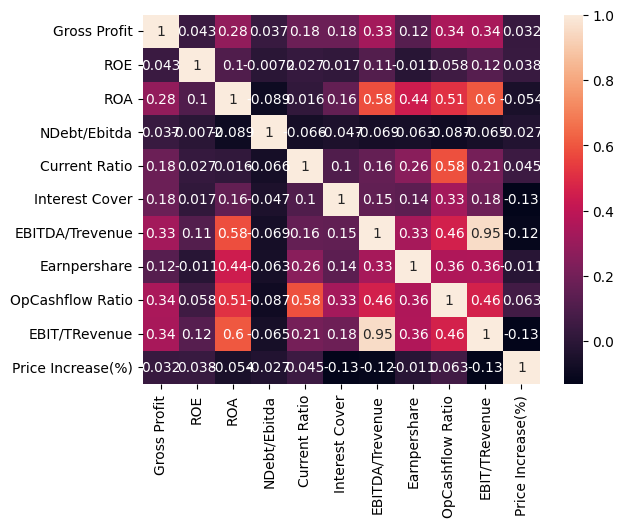

In [188]:
sns.heatmap(df[df.columns[1:]].corr(), annot=True)

<Axes: ylabel='Gross Profit'>

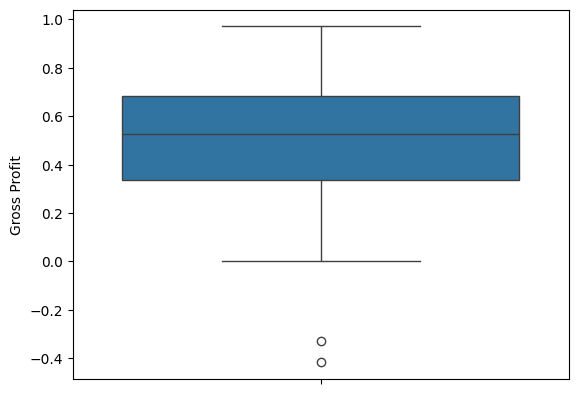

In [90]:
#Outlier detection
sns.boxplot(df["Gross Profit"])

In [100]:
#Outlier detection
upper_limit = df["EBIT/TRevenue"].mean()+3*df["EBIT/TRevenue"].std()
lower_limit = df["EBIT/TRevenue"].mean()-3*df["EBIT/TRevenue"].std()
print("upper limit: ",upper_limit)
print("lower limit: ",lower_limit)

upper limit:  0.8837035087295166
lower limit:  -0.5005345323349182


In [101]:
#finding outliers 
df.loc[(df["EBIT/TRevenue"]>upper_limit)| (df["EBIT/TRevenue"]<lower_limit)]
#deleted 287,384,385,386,387,388,389,390,391,392 as outliers

,Unnamed: 0,Gross Profit,ROE,ROA,NDebt/Ebitda,Current Ratio,Interest Cover,EBITDA/Trevenue,Earnpershare,OpCashflow Ratio,EBIT/TRevenue,Price Increase
74,75,0.682824,-1.729801,-0.463614,-4.599052,1.042175,-7.752778,-0.365070,-10.449761,-0.709212,-0.536834,1
90,91,0.648342,-0.667374,-1.236731,-0.907814,1.284169,-165.769231,-0.854276,-21.767677,0.141363,-0.940227,0
125,126,0.970803,-0.291683,-0.118609,-0.323770,1.434951,-77.179850,-2.671533,-1.913299,0.461836,-2.784672,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('financials.csv')

df = df.drop(columns=['Ticker'])

df.dropna(inplace=True)

X = df.drop(columns=['Price Increase(%)'])
y = df['Price Increase(%)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='black', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Price Increase(%)')
plt.ylabel('Predicted Price Increase(%)')
plt.title('Actual vs Predicted Price Increase(%)')
plt.legend()
plt.show()

print("Mean Absolute Error (MAE):", mae)



ModuleNotFoundError: No module named 'matplotlib'

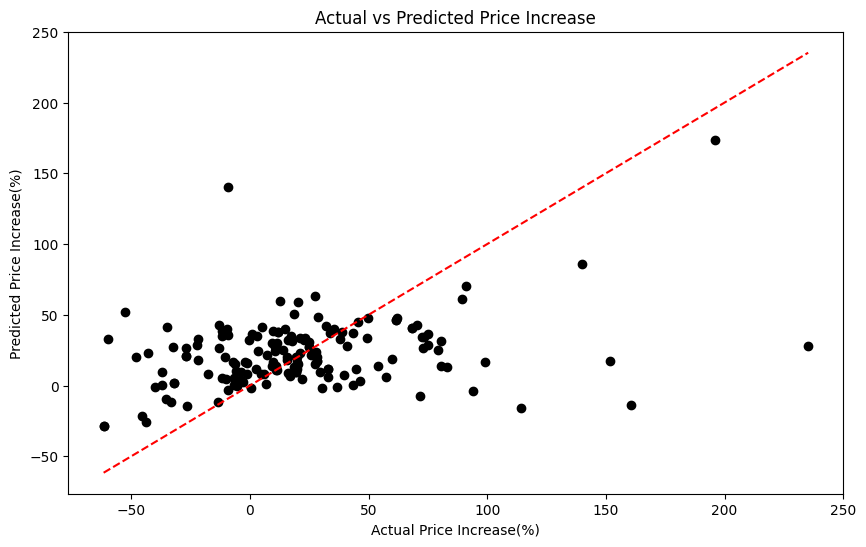

Mean Absolute Error (MAE): 30.058968997595592


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

df = pd.read_csv('financials.csv') 


df = df.drop(columns=['Ticker'])


df.dropna(inplace=True)

X = df.drop(columns=['Price Increase(%)'])
y = df['Price Increase(%)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)


feature_importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


num_top_features = 5 
top_features = feature_importance_df.head(num_top_features)['Feature'].tolist()


X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train_top)
X_test_pca = pca.transform(X_test_top)


rf_model_pca = RandomForestRegressor(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

y_pred = rf_model_pca.predict(X_test_pca)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price Increase(%)')
plt.ylabel('Predicted Price Increase(%)')
plt.title('Actual vs Predicted Price Increase')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('financials.csv')  


df = df.drop(columns=['Ticker'])
df.dropna(inplace=True)

df['Price Increase'] = (df['Price Increase(%)'] > 0).astype(int)
df.drop(columns=['Price Increase(%)'], inplace=True)


X = df.drop(columns=['Price Increase'])
y = df['Price Increase']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_pca, y_train)


y_pred = rf_clf.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6962025316455697
